In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
df1 = pd.read_csv('./Training_Data/Linear_X_Train.csv')
df2 = pd.read_csv('./Training_Data/Linear_Y_Train.csv')

In [7]:
x = df1.values
y = df2.values

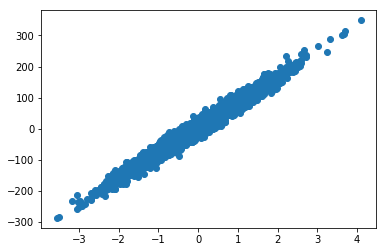

In [9]:
plt.scatter(x,y)

In [10]:
X = (x-x.mean())/x.std()
Y = y

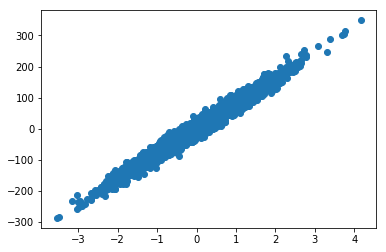

In [11]:
plt.scatter(X,Y)

In [15]:
def hy(x,t):
    return t[0] + t[1]*x
def error(X,Y,t):
    m = X.shape[0]
    err = 0
    for i in range(m):
        err+= (hy(X[i],t) -Y[i])**2
    return err
def gradient(X,Y,t):
    g = np.zeros((2,))
    m = X.shape[0]
    for i in range(m):
        g[0] += hy(X[i],t) - Y[i]
        g[1] += (hy(X[i],t) - Y[i])*X[i]
    return g
def gradient_desent(X,Y,lr=0.0001):
    t = np.zeros((2,))
    g = np.zeros((2,))
    e = []
    itr=0
    while(itr<100):
        g = gradient(X,Y,t)
        e.append(error(X,Y,t))
        t[0] = t[0] - lr*g[0]
        t[1] = t[1] - lr*g[1]
        itr+=1
    return t,e

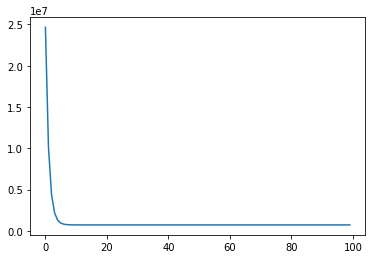

[ 0.68386897 79.90573694]


In [16]:
final_t,e = gradient_desent(X,Y)
plt.plot(e)
plt.show()
print(final_t)

In [17]:
df3 = pd.read_csv('./Test_Data/Linear_X_Test.csv')

In [18]:
X_test = df3.values

In [19]:
X_test.shape

(1250, 1)

In [21]:
Y_test = hy(X_test,final_t)

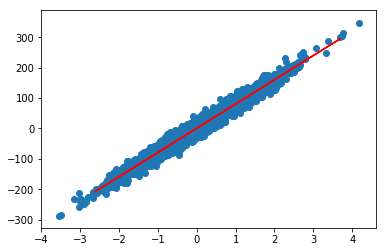

In [22]:
plt.plot(X_test,Y_test,color='red')
plt.scatter(X,Y)
plt.show()

In [23]:
Y_test

array([[-149.37466337],
       [ -68.7567667 ],
       [-201.49222227],
       ...,
       [  10.91242825],
       [ -21.53292954],
       [ -53.68602633]])

In [24]:
df4 = pd.DataFrame(Y_test)

In [25]:
df4

,0
0,-149.374663
1,-68.756767
2,-201.492222
3,221.240119
4,47.908170
5,-102.842041
6,-15.043818
7,24.022526
8,-64.974124
9,-119.299896


In [26]:
df2

,y
0,-0.091101
1,-53.467721
2,75.457009
3,-12.025286
4,57.414187
5,-110.849412
6,-49.454190
7,132.396214
8,72.198856
9,-51.274366


In [27]:
df4.to_csv('answer.csv')